In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random, datetime
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [12]:
G = 6.67e-11 #m^3/(kg-s^2)
class Planet():
    def __init__(self, x, v, mass, name):
        self.pos = x
        self.vel = v
        self.mass = mass
        self.name = name
        self.force = None
        
    def step(self,dt):
        accel = self.force / self.mass
        
        self.pos += self.vel*dt + accel*dt*dt/2
        self.vel += accel*dt
        

In [62]:
E = Planet(1.496e11*np.array([-9.237557535202985E-01,3.536366277095143E-01,1.600926435129901E-04]),
           (1.496e11/(24*3600))*np.array([-6.350281537866177E-03,-1.616431692670500E-02,1.332879821178787E-06]),5.972e24 , 'Earth')
M = Planet(1.496e11*np.array([9.513247801138148E-01, 1.130077777411097E+00, 1.696914559765426E-04]),
           (1.496e11/(24*3600))*np.array([-1.017477493793646E-02,1.021561971995748E-02,4.636360953654679E-04]),6.4185e23 , 'Mars')
V = Planet(1.496e11*np.array([-5.732278491639108E-01,4.315239619840703E-01,3.896946603670383E-02]),
           (1.496e11/(24*3600))*np.array([-1.212435654901208E-02,-1.634548295333031E-02,4.752996156732910E-04]),48.685e23 , 'Venus')
S = Planet(1.496e11*np.array([0,0,0]),
           (1.496e11/(24*3600))*np.array([0,0,0]),1.99e30 , 'Sun')

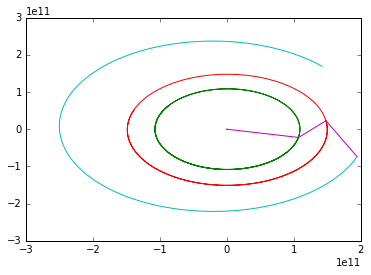

In [43]:
PLST = [S, V, E, M]
def calc_forces(planets):
    for i1, p1 in enumerate(planets):
        p1.force = np.array([0.,0.,0.])
        for i2, p2 in enumerate(planets):
            if i1 == i2:
                continue
            else:
                r = p2.pos - p1.pos
                rsq = np.dot(r,r)
                r_dir = r / np.sqrt(rsq)
                p1.force += G*p1.mass*p2.mass*r_dir/ (rsq)
                

def iterate(dt):
    calc_forces(PLST)
    for p in PLST:
        p.step(dt)

STEPS = 50000
PATHS = {}
for p in ['Sun', 'Venus', 'Earth', 'Mars']:
    PATHS[p] = np.zeros([STEPS,3])
for n in range(STEPS):
    for p in PLST:
        PATHS[p.name][n,:] = p.pos
    iterate(1000)
for key, val in PATHS.items():
    plt.plot(val[:,0],val[:,1])
x0,y0 = [p.pos[0] for p in PLST], [p.pos[1] for p in PLST]
plt.plot(x0,y0,'o')

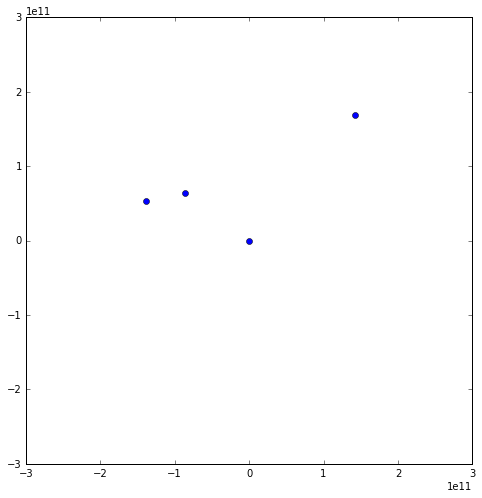

In [15]:
#Set up for the animation
'''
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-3e11, 3e11)
ax.set_ylim(-3e11,3e11)
x0,y0 = [p.pos[0] for p in PLST], [p.pos[1] for p in PLST]
line1 = ax.plot(x0, y0, 'o')[0]
def init():
    line1.set_data([], [])

    return (line1,)
def animate(i):
    
    iterate(3600)
    x1,y1 = [p.pos[0] for p in PLST], [p.pos[1] for p in PLST]

    line1.set_data(x1, y1)

    return (line1,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25000, interval=20, blit=True)
anim.save('test.mp4', fps=25, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())
'''

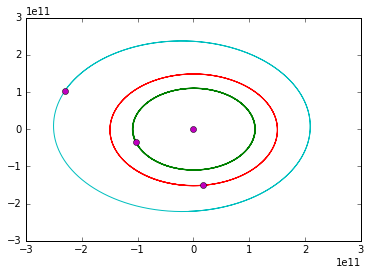

In [32]:
for key, val in PATHS.items():
    plt.plot(val[:,0],val[:,1])
x0,y0 = [p.pos[0] for p in PLST], [p.pos[1] for p in PLST]
plt.plot(x0,y0,'o')

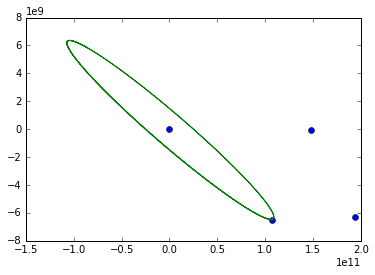

In [54]:
z0 = [p.pos[2] for p in PLST]
plt.plot(x0,z0,'o')
plt.plot(PATHS['Venus'][:,0], PATHS['Venus'][:,2])

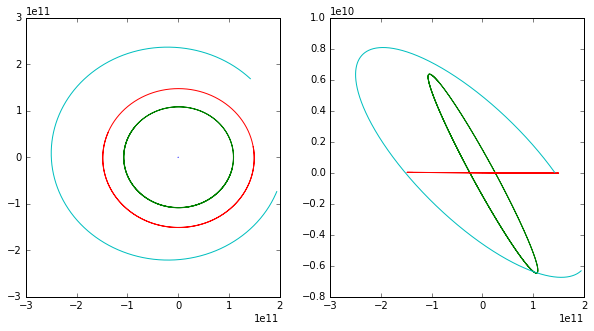

In [61]:
f, a = plt.subplots(1,2, figsize=(10,5))
for key, val in PATHS.items():
    a[0].plot(val[:,0],val[:,1])
    a[1].plot(val[:,0],val[:,2])

In [65]:
E.mass

5.972e+24

In [73]:
max(abs(PATHS['Earth'][:,0]))

150112506411.17807

In [74]:
min(abs(PATHS['Earth'][:,0]))

3355285.4840591364

In [75]:
150112506411*1e-11

1.50112506411

In [76]:
1.5e11

150000000000.0